In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from toolbox.tools_signal import *
from toolbox.geodesic import *

import ot

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)


# Geodesic between two signal from C. elegans database

In [3]:
n = 77
new_data = np.zeros((n,901))
with open("data/WormsTwoClass_TEST.tsv") as f:
    lines = f.read().split('\n')[:-1]
    for i, line in enumerate(lines):
        if i == 0: # header
            new_data[i,:] = line.split()
        else:
            new_data[i,:] = line.split()
            
# Split data into several classes
data = np.delete(new_data, 0, 1)

sig1 = data[0,:]
sig2 = data[1,:]
times = np.linspace(0,1,900)
frequencies = np.linspace(-40,40,601)

psd1 = Signal2NPSD(frequencies, times, sig1)
psd2 = Signal2NPSD(frequencies, times, sig2)
phase1 = np.unwrap(np.angle(fourierTransform(frequencies,times,sig1)))
phase2 = np.unwrap(np.angle(fourierTransform(frequencies,times,sig2)))


# number of interpolants
nb_interp = 10

# interpolation in the frequency domain
supports_psds, interp_psd = get_geodesic_entropy(psd1, psd2, frequencies, nb_interp, reg = 1e-1)

interp_signal = []
interp_signal_mod2pi = []
taus = np.linspace(0, 1, nb_interp)
for j, (s, v) in enumerate(zip(supports_psds, interp_psd)):
    interp_signal.append(PF_to_signal(s,times,v, (phase2%(2*np.pi))*taus[j] + (phase1%(2*np.pi))*(1-taus[j])))


Text(0.5,1,'10-step interpolant using the Wasserstein-Fourier distance')

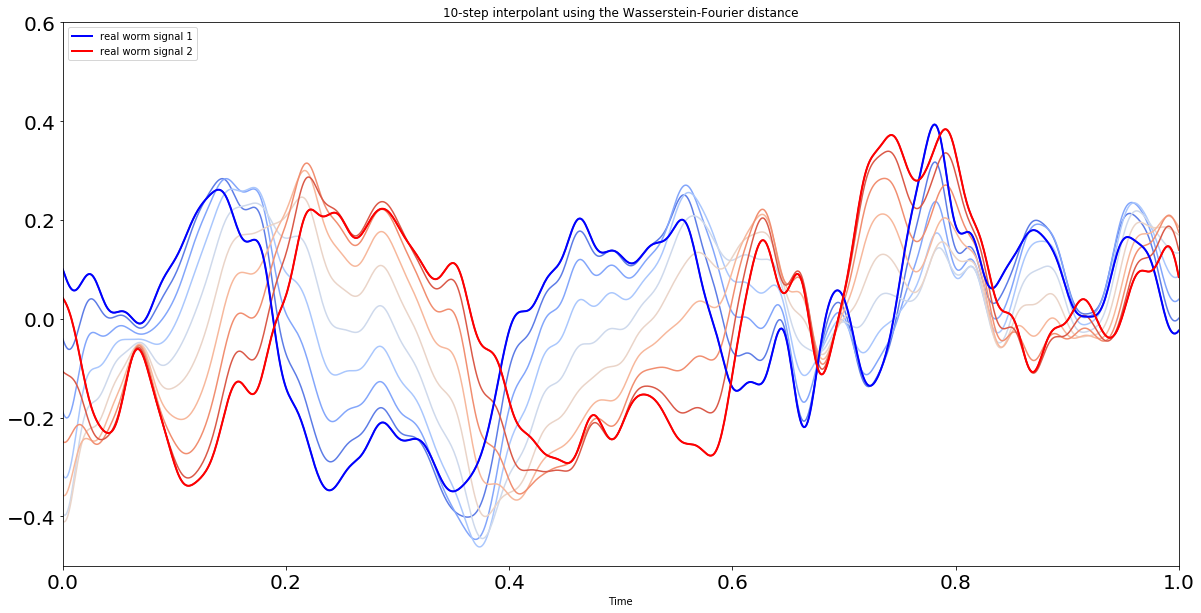

In [4]:
### Plot of the interpolatant ###

plt.figure(figsize=(20,10))
mapp = matplotlib.cm.get_cmap('coolwarm',nb_interp)
for i in np.arange(nb_interp):
    plt.plot(times,interp_signal[i].real,color = mapp(i))
plt.plot(times, interp_signal[0].real, lw = 2, color = 'blue', label = 'real worm signal 1')
plt.plot(times, interp_signal[-1].real, lw = 2, color = 'red', label = 'real worm signal 2')
plt.xlabel('Time')
plt.xlim([0, 1])
plt.ylim([-0.5, 0.6])
plt.legend(loc='upper left', fancybox=True)
plt.title('{}-step interpolant using the Wasserstein-Fourier distance'.format(nb_interp))


